# Content
1. Data
2. Train Test Split
3. Logistic Regression
4. KNN Classifier
5. Support Vector Machine(SVM)
6. Naive Bayes
7. Decision Tree Classifier
8. Random Forest Classifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Data

In [4]:
df = pd.read_csv("column_3C_weka.csv")

print(df.isna().sum())
print("Total null values: ",df.isnull().sum().sum())
df.info()

df.nunique()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
Total null values:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


pelvic_incidence            310
pelvic_tilt                 310
lumbar_lordosis_angle       280
sacral_slope                281
pelvic_radius               310
degree_spondylolisthesis    310
class                         3
dtype: int64

In [5]:
# Converting object values to numeric
df["class"] = [0 if each == "Hernia" else 1 if each == "Spondylolisthesis" else 2 for each in df["class"]] 

In [6]:
# x and y
x_data = df.drop(["class"],axis = 1)
y = df["class"].values

In [7]:
# Normalization
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

# 2. Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x, y,test_size=0.2,random_state=42)

# 3. Logistic Regression

In [43]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

print("Score: ",lr.score(x_test,y_test))

Score:  0.6935483870967742


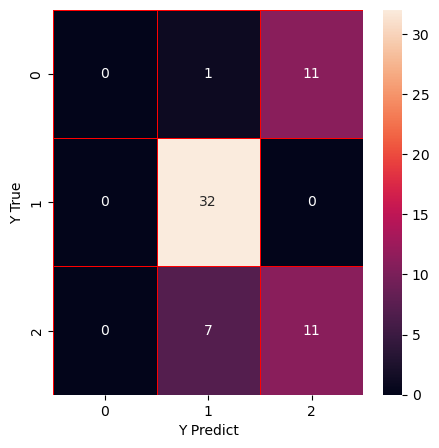

In [44]:

# Confusion Matrix For Logistic Regression
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y True")
plt.show()

# 4. KNN Classifier

> Finding score range(1,15) neighbors


In [10]:
# Finding score range(1,15) neighbors

from sklearn.neighbors import KNeighborsClassifier
score_list = []

for i in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

> Score visualization

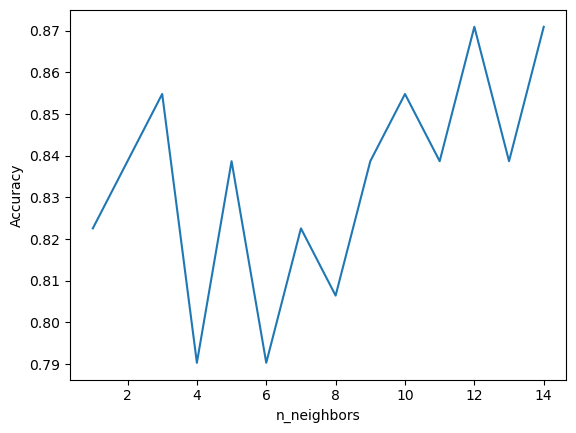

In [11]:
# Score visualization
plt.plot(range(1,15),score_list)
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

We can see best n_neigbors(best_k) value in the plot. Let's see in code

In [12]:
best_k = 0

for i in range(len(score_list)):
    
    if score_list[i] > score_list[best_k]:
        best_k = i

best_k = best_k + 1 # Because score_list[0] k=1 ,score_list[1] k = 2,..., score_list[n] k = n+1
print(score_list)
print(best_k)


[0.8225806451612904, 0.8387096774193549, 0.8548387096774194, 0.7903225806451613, 0.8387096774193549, 0.7903225806451613, 0.8225806451612904, 0.8064516129032258, 0.8387096774193549, 0.8548387096774194, 0.8387096774193549, 0.8709677419354839, 0.8387096774193549, 0.8709677419354839]
12


> KNN Model

In [13]:
# KNN Model

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)
print("{} nn Score: {} ".format(best_k,knn.score(x_test,y_test)))


12 nn Score: 0.8709677419354839 


> Confusion Matrix

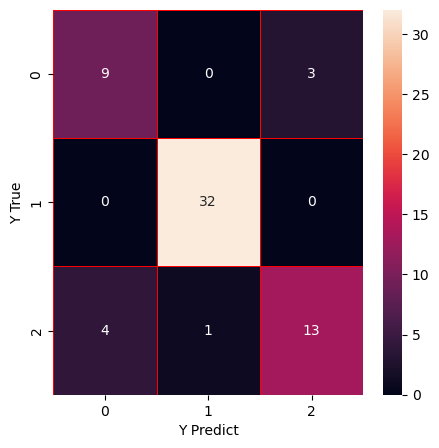

In [14]:
# Confusion Matrix For Knn Model
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y True")
plt.show()

# 5. Support Vector Machine(SVM)

In [15]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(x_train,y_train)

print("Support Vector Machine Accuracy: ",svm.score(x_test,y_test))

Support Vector Machine Accuracy:  0.8387096774193549


> Confusion Matrix

Text(33.22222222222222, 0.5, 'Y True')

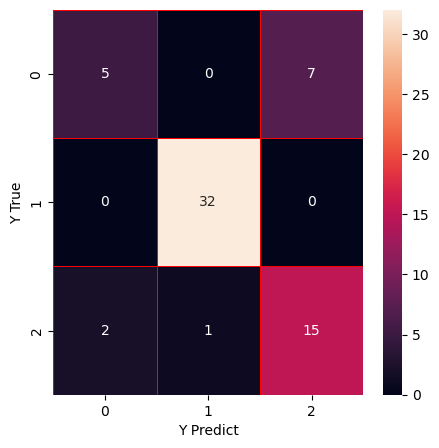

In [16]:
# Confusion Matrix For Svm Model
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y True")

# 6. Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

print("Naive Bayes Accuracy",nb.score(x_test,y_test))

Naive Bayes Accuracy 0.8709677419354839


> Confusion Matrix

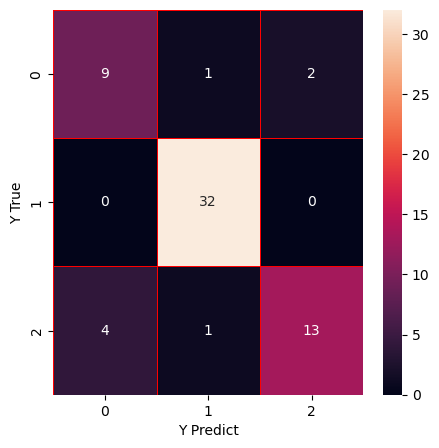

In [18]:
# Confusion Matrix For Naive Bayes Model

y_pred = nb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y True")
plt.show()


# 7. Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

print("Decision Tree Accuracy: ",dt.score(x_test, y_test))

Decision Tree Accuracy:  0.7419354838709677


> Confusion Matrix

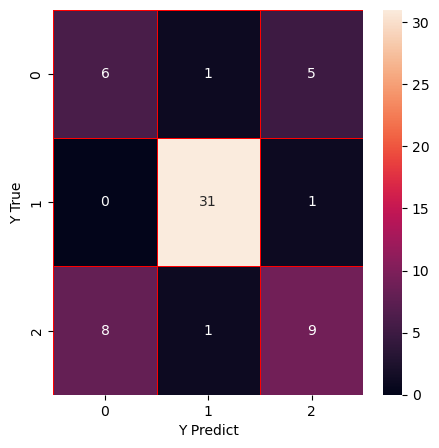

In [21]:
# Confusion Matrix For Decision Tree

y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y True")
plt.show()> Confusion Matrix

# 8. Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)

print("Random Forest Classifier Accuracy: ",rf.score(x_test,y_test))

Random Forest Classifier Accuracy:  0.8709677419354839


> Confusion Matrix

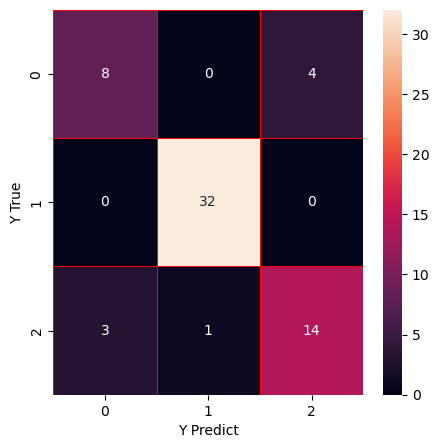

In [23]:
#Confusion Matrix For Random Forest Classifier

y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y True")
plt.show()> Confusion Matrix